# 🍽️ Full Data Science Project: Zomato Data Analysis 🍕

In [ ]:
# zomato is a very big company where large amount of data is available
# like customers data, restaurant partners data.
# and in kai sare data se bhut sare important business insights nikalne hote hai.
# jiske liye zomato bhi kai sare data analyst data scientist jaise designation ke liye hire krta hai.

# Today in this project we will find very important/useful insights from zomato data.
# and also we will doing eda and perform visualization.

# benefits of this project.
#<-------------------------->
# increase confidence, our understanding and skills.
# we can add in resume and portfolio.
# Helpful to increase the weightage of our resume.

In [2]:
# Data Analysis Project Using Python
#<----------------------------------->

# Zomato (Deepinder Goyal, CEO)

# Zomato has an avergae of 17.5 million monthly transacting customers
# for its food delivery business averge monthly active fool
# delivery restaurant partners on Zomato's platform have also increased by
# 8.7 year-on-year, from 208,000 to 226,000. You are working in a 
# data-driven role at Zomato. You have a dataset of customers.
# As a data professional, you need to analyze the data, 
# perform EDA (Exploratory Data Analysis) and visualizaton, and 
# answer the following questions:

In [3]:
# Questions
#<----------->

# 1) What type of restaurant do the majority of customers order from?
# 2) How many votes has each type of restaurant receiveed from customers?
# 3) what are the ratings that the majority of restaurants have received?
# 4) Zomato has observed that most couples order most of their food online. What is their
# average spending on each order?
# 5) Which mode (online or offline) has received the maximum rating?
# 6) Which type of restaurant received more offline orders, so that Zomato can provide those  
# customers with some good offers?

# We have to solve these 6 questions.
# Interview question specially asked in round no. 1



# We have available some records in the dataset 
# and we have to solve the questions.

# 🍣 Zomato data analysis project 🍕

# Step 1 - Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 - Creating the data frame¶

In [7]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# let's convert the data type of the "rate" column to float and remove the denominator.¶

In [8]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

# def -> 1st we will creating user defined function.
# print is inbuilt function.

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# summary of the data frame¶

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion - There is no Null value in dataframe.

In [10]:
# mycode)
dataframe.isnull()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


In [11]:
# mycode
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [12]:
# mycode
dataframe.isnull().sum().sum()

0

# 1) What type of restaurant do the majority of customers order from?

# Type of restaurant

In [14]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

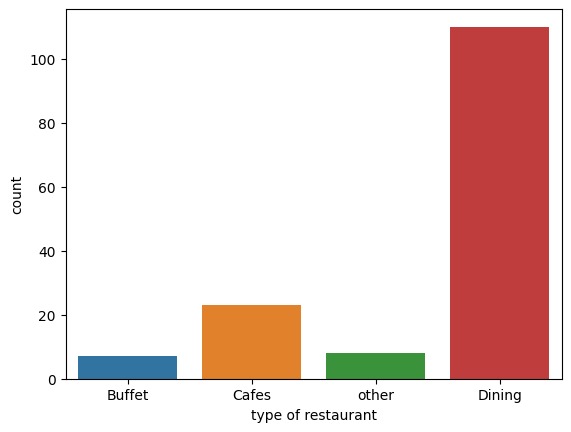

In [17]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

# conclusion - majority of the restaurant falls into the dining category.¶

# Dining restaurants are preferred by a larger number of individuals.

In [19]:
# count
dataframe['listed_in(type)'].count()

148

In [20]:
# value_counts()
dataframe['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [21]:
# unique
dataframe['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [22]:
# nunique
dataframe['listed_in(type)'].nunique()

4

# 2) How many votes has each type of restaurant received from cutomers?

In [23]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

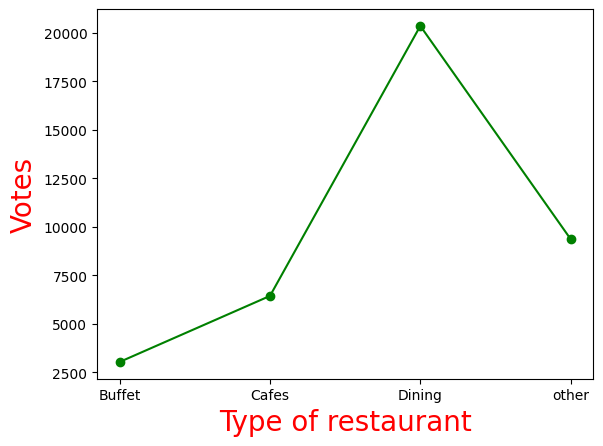

In [24]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

Text(0, 0.5, 'Votes')

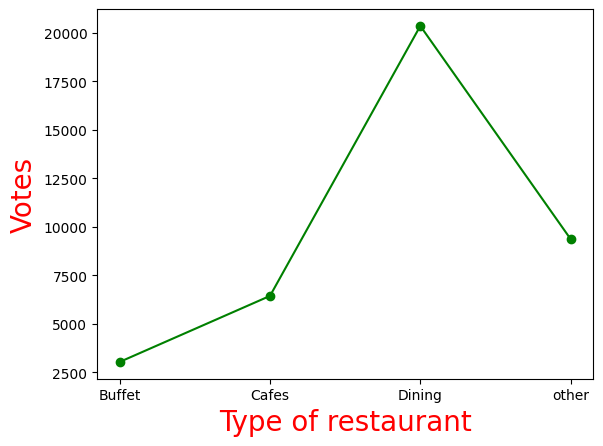

In [25]:
# mycode (not need to write result line as above code)

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
plt.plot(grouped_data, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

In [27]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().reset_index()
grouped_data

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


Text(0, 0.5, 'Votes')

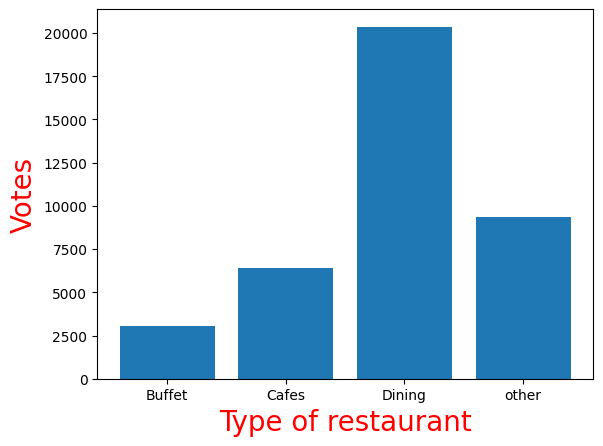

In [28]:
# we can use bar plot instead of line plot in quest 2

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().reset_index()
# grouped_data
plt.bar(grouped_data['listed_in(type)'], grouped_data['votes'])
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

# conclusion: dining restaurants has received maximum votes

# 3) What are the ratings that the majority of restaurants have received?/

In [31]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


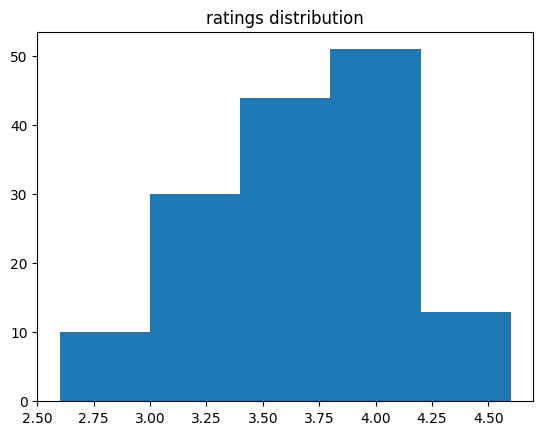

In [32]:
plt.hist(dataframe['rate'],bins = 5)
plt.title("ratings distribution")
plt.show()

# conclusion - the majority restaurants received ratings from 3.5 to 4

# 4) Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [33]:
# couples like 2 working professionals in city like metro cities
# like banglore, hyderabad, pune.

# to zomato ne observe kiya ki most couples order most of their food online.
# to hme btana hai ki, wo jo food order krte hai uska average size kya hoga.
# 500 rupees, 600 rupees etc.

# Now we will write code, and extract insights from data.

In [34]:
# Average order spending by couples

In [35]:
# // we will look/glance the dataframe at once.
dataframe.head()

# //markdown is used to give the heading.

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [36]:
# Now will visualize it by making graph.
# Becoz when we go in the company then we will make reports, dashboards.
# then we will explain our reports and dashboards through the graphs.
# so, in this video we will perform more visualization with EDA.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

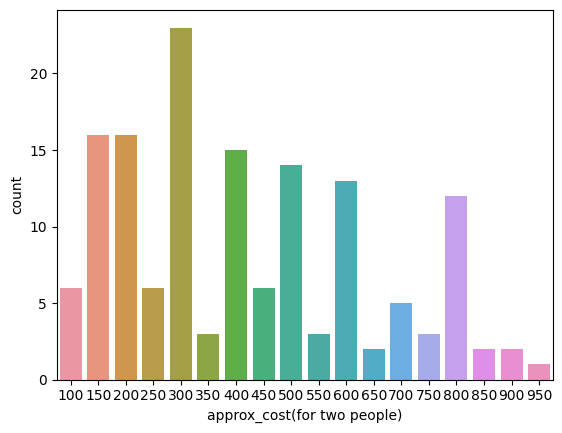

In [37]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [38]:
# Now we have to check that which amount is greatest.
# so, the 300 ruppes bar is more. hme yhi find krna tha(we had to find this).
# so couples sbse jada 300 rupee ke order krte hai.

# Now company ko jb ye data pta chl gya to company unke app pe menu pe
# jo update honge wo ese order suggest krenge jo 300 rupee se 500 rupee ke bich ho.

# taki logo ke order ki capacity kya hai -> 300 rupee ke around hai, to whi cheez dikhai
# jaye na jo wo buy kr skte hai.

# for ex: kisi person ka budget iphone khredne ka nhi hai. uka budget hai 10000 hai phone lene ka.
# # to hm use iphone dikhayenge to wo use buy nhi krega.

# to hme jo budget hai customer ka use smjhna hai.
# and then unhe item dikhaye


# to in the above graph se company ko ye pta chl gya ki customer ko 300 rupees tk ke product
# unko dikhana shuru kr denge.

# very few couples spend 950 rupees order for 2 peoples.

# conclusion - the majority of couples prefer restaurants with an approximate cost of 300 rupees

In [40]:
# Note: jb hm project krna sikh rhe hai to hme hmesha conclusion ese likha hai.
# taki age na bhule.

# Now hm hi log hote hai ese data professionals jinke insight company ke bhut bde bde kam
# ke liye help krte hai

# 5) Which mode (online or offline) has received the maximum rating?

In [41]:
# Now 1st we will look  the dataframe
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

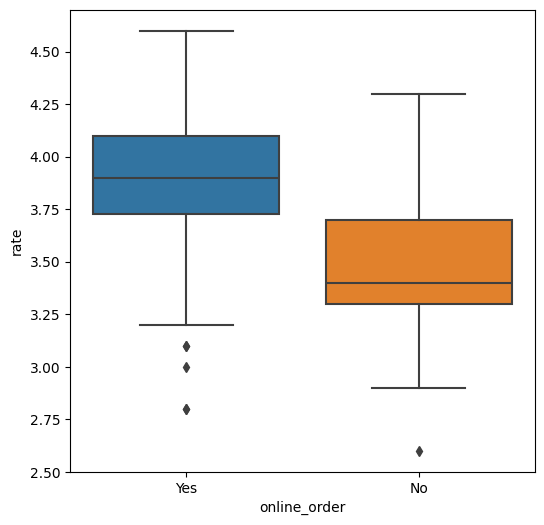

In [42]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

In [43]:
# online rating -> 4.25 to 3.75
# offline rating -> 3.75 to 3.25
# It means peoples who order online gives good rating as comapare to offline peoples.

# conclusion = offline order received lower rating in comparision to online orders, which obtained excellent ratings.

In [44]:
# it means when customers order online then zomato ki ratings ache hai.
# but little bit need to improvement in offline.

In [45]:
# mycode
# dataframe.groupby('online_order')['rate'].sum().reset_index()

<Axes: xlabel='online_order', ylabel='rate'>

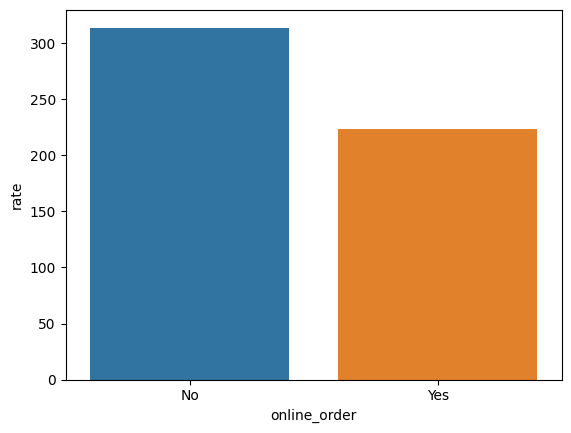

In [46]:
# mycode
grouped_online_order1=dataframe.groupby('online_order')['rate'].sum().reset_index()
sns.barplot(x='online_order', y='rate',  data=grouped_online_order1)

# use reset_index else it shows error

# online offline ko bar plot se bhi visualize kr skte hai.
# it is also good plot for the 5th question.

# 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [47]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Doubt (dining and other values not show in heatmap cell)

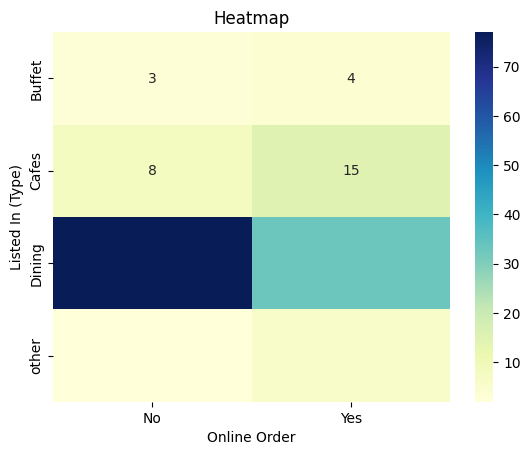

In [48]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

# The parameter annot=True means that the actual data values will be displayed on the heatmap cells.
# fmt = 'd' means integer numbers.
# fmt = '.2f' means 2 floting point no. also
# cmap='YlGnBu', means yellow, green, blue

# CONCLUSION: Dining restaurants primarily accept offline order, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.¶